In [1]:
#MOD 6.1.4

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# The zip object packs each pair of lats and lngs having the same index in their respective array 
# into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired 
# latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the 
# index of 0 and 1, respectively.

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)



In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
#MOD 6.1.5

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kahului us
kendari id
hithadhoo mv
yellowknife ca
chiredzi zw
ambunti pg
bolungarvik is
comodoro rivadavia ar
agadez ne
marawi sd
port alfred za
hermanus za
ilulissat gl
yuanping cn
leh in
sinnai it
carnarvon au
port alfred za
mahebourg mu
chagda ru
lompoc us
taolanaro mg
desna ua
rikitea pf
saleaula ws
ushuaia ar
taolanaro mg
barrow us
punta arenas cl
airai pw
esperance au
ushuaia ar
kapaa us
padang id
hilo us
camargo mx
port-gentil ga
gunjur gm
ushuaia ar
punta arenas cl
sale au
taolanaro mg
dikson ru
hobart au
paamiut gl
valle de allende mx
sorong id
xining cn
dakar sn
mys shmidta ru
bambous virieux mu
cape town za
lander us
ferrol es
garissa ke
provideniya ru
nanortalik gl
tambacounda sn
east london za
turukhansk ru
ahuachapan sv
punta arenas cl
mascote br
jamestown sh
attawapiskat ca
rikitea pf
abha sa
akdepe tm
katsuura jp
bluff nz
sentyabrskiy ru
dingle ie
albany au
vitre fr
yerbogachen ru
hermanus za
hilo us
jiangyou cn
barentsburg sj
bredasdorp za
kirakira sb
bethel us
barrow 

hilo us
lesosibirsk ru
busselton au
bluff nz
busselton au
hermanus za
belushya guba ru
ushuaia ar
hohhot cn
cherskiy ru
ushuaia ar
punta arenas cl
hobyo so
belushya guba ru
sitka us
puerto ayora ec
westpunt an
busselton au
barrow us
jamestown sh
kapaa us
kaitangata nz
butaritari ki
ushuaia ar
kapaa us
port elizabeth za
changping cn
pisco pe
east london za
nam tha la
caravelas br
bambanglipuro id
saint-philippe re
adrar dz
albany au
vilyuysk ru
mataura pf
the valley ai
jamestown sh
carnarvon au
narsaq gl
palabuhanratu id
butaritari ki
sobolevo ru
faanui pf
butaritari ki
hermanus za
jamestown sh
ust-tsilma ru
thunder bay ca
bredasdorp za
maceio br
hithadhoo mv
dunedin nz
aklavik ca
port alfred za
chiniot pk
tuktoyaktuk ca
phan rang vn
cabo san lucas mx
atuona pf
nyuksenitsa ru
broken hill au
outlook ca
karpathos gr
puerto ayora ec
mys shmidta ru
ascension mx
hobart au
butaritari ki
korla cn
torbay ca
atar mr
praia da vitoria pt
halalo wf
new norfolk au
cherskiy ru
clyde river ca
busselto

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
#print(cities)

617

In [10]:
#MOD 6.2.6

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Starting URL for Weather Map API Call.
#Note units=imperial, can change to metric if needed.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + "Boston"

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kahului
Processing Record 2 of Set 1 | kendari
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | chiredzi
Processing Record 6 of Set 1 | ambunti
Processing Record 7 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 8 of Set 1 | comodoro rivadavia
Processing Record 9 of Set 1 | agadez
Processing Record 10 of Set 1 | marawi
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | yuanping
Processing Record 15 of Set 1 | leh
Processing Record 16 of Set 1 | sinnai
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | chagda
City not found. Skipping...
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping..

Processing Record 39 of Set 4 | tukrah
Processing Record 40 of Set 4 | belluno
Processing Record 41 of Set 4 | san luis
Processing Record 42 of Set 4 | lloydminster
Processing Record 43 of Set 4 | uroteppa
City not found. Skipping...
Processing Record 44 of Set 4 | labuan
Processing Record 45 of Set 4 | santa rosa
Processing Record 46 of Set 4 | kurchum
Processing Record 47 of Set 4 | the valley
Processing Record 48 of Set 4 | camacari
Processing Record 49 of Set 4 | sept-iles
Processing Record 50 of Set 4 | hambantota
Processing Record 1 of Set 5 | margate
Processing Record 2 of Set 5 | meulaboh
Processing Record 3 of Set 5 | havre-saint-pierre
Processing Record 4 of Set 5 | vila franca do campo
Processing Record 5 of Set 5 | kaspiysk
Processing Record 6 of Set 5 | rungata
City not found. Skipping...
Processing Record 7 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 5 | tevaitoa
Processing Record 9 of Set 5 | taltal
Processing Record 10 of Set 5 | redlands


Processing Record 29 of Set 8 | constitucion
Processing Record 30 of Set 8 | cotacachi
Processing Record 31 of Set 8 | lesosibirsk
Processing Record 32 of Set 8 | hohhot
Processing Record 33 of Set 8 | hobyo
Processing Record 34 of Set 8 | westpunt
City not found. Skipping...
Processing Record 35 of Set 8 | changping
Processing Record 36 of Set 8 | nam tha
City not found. Skipping...
Processing Record 37 of Set 8 | caravelas
Processing Record 38 of Set 8 | bambanglipuro
Processing Record 39 of Set 8 | adrar
Processing Record 40 of Set 8 | vilyuysk
Processing Record 41 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 42 of Set 8 | sobolevo
Processing Record 43 of Set 8 | ust-tsilma
Processing Record 44 of Set 8 | thunder bay
Processing Record 45 of Set 8 | dunedin
Processing Record 46 of Set 8 | aklavik
Processing Record 47 of Set 8 | chiniot
Processing Record 48 of Set 8 | phan rang
City not found. Skipping...
Processing Record 49 of Set 8 | nyuksenitsa
Processing

Processing Record 20 of Set 12 | korem
Processing Record 21 of Set 12 | desaguadero
Processing Record 22 of Set 12 | maniitsoq
Processing Record 23 of Set 12 | portage
Processing Record 24 of Set 12 | ituni
City not found. Skipping...
Processing Record 25 of Set 12 | maridi
Processing Record 26 of Set 12 | hualmay
Processing Record 27 of Set 12 | dehloran
Processing Record 28 of Set 12 | jacareacanga
Processing Record 29 of Set 12 | tabory
Processing Record 30 of Set 12 | cabedelo
Processing Record 31 of Set 12 | leshukonskoye
Processing Record 32 of Set 12 | sataua
City not found. Skipping...
Processing Record 33 of Set 12 | morris
Processing Record 34 of Set 12 | duz
City not found. Skipping...
Processing Record 35 of Set 12 | slonim
Processing Record 36 of Set 12 | sambava
Processing Record 37 of Set 12 | vanavara
Processing Record 38 of Set 12 | mashhad
Processing Record 39 of Set 12 | sakaiminato
Processing Record 40 of Set 12 | chumikan
Processing Record 41 of Set 12 | balabac
Pr

In [14]:
#MOD 6.2.7 Converting list of dionaties to Dataframe and exporting to CSV

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,71.83,89,3,5.99,US,2022-01-25 14:59:54
1,Kendari,-3.9450,122.4989,77.25,90,69,1.12,ID,2022-01-25 15:04:53
2,Hithadhoo,-0.6000,73.0833,81.88,66,71,15.73,MV,2022-01-25 15:04:53
3,Yellowknife,62.4560,-114.3525,5.41,92,100,15.01,CA,2022-01-25 15:04:53
4,Chiredzi,-21.0500,31.6667,75.24,82,100,11.48,ZW,2022-01-25 15:04:54
5,Ambunti,-4.2365,142.8448,74.48,97,100,1.66,PG,2022-01-25 15:04:54
6,Comodoro Rivadavia,-45.8667,-67.5000,59.68,67,26,12.10,AR,2022-01-25 15:00:01
7,Agadez,19.7500,10.2500,68.27,14,0,12.01,NE,2022-01-25 15:04:54
8,Marawi,7.9986,124.2928,66.65,99,100,3.33,PH,2022-01-25 15:04:55
9,Port Alfred,-33.5906,26.8910,76.01,72,43,14.36,ZA,2022-01-25 15:04:55


In [15]:
#Reorder Columns of dataframe
new_col_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_col_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kahului,US,2022-01-25 14:59:54,20.8947,-156.4700,71.83,89,3,5.99
1,Kendari,ID,2022-01-25 15:04:53,-3.9450,122.4989,77.25,90,69,1.12
2,Hithadhoo,MV,2022-01-25 15:04:53,-0.6000,73.0833,81.88,66,71,15.73
3,Yellowknife,CA,2022-01-25 15:04:53,62.4560,-114.3525,5.41,92,100,15.01
4,Chiredzi,ZW,2022-01-25 15:04:54,-21.0500,31.6667,75.24,82,100,11.48
...,...,...,...,...,...,...,...,...,...
564,Jaguaribe,BR,2022-01-25 15:19:52,-5.8906,-38.6219,92.84,41,86,5.30
565,Tomatlan,MX,2022-01-25 15:19:52,19.9333,-105.2500,71.26,47,0,2.48
566,Vostok,RU,2022-01-25 15:19:53,46.4856,135.8833,-6.09,100,100,3.96
567,Ola,RU,2022-01-25 15:19:53,59.5833,151.2833,-18.09,90,29,7.67


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
#MOD 6.3.1

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

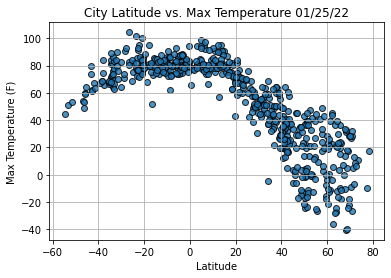

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
#MOD 6.3.2

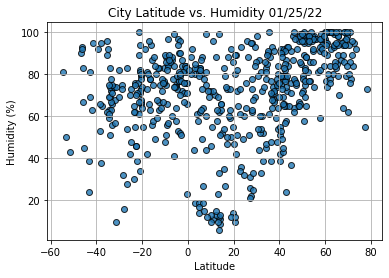

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [ ]:
#MOD 6.3.3

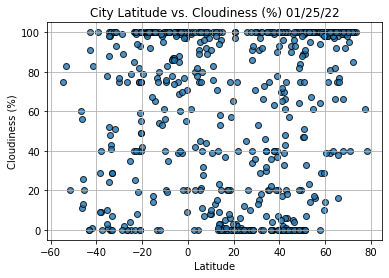

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
#MOD 6.3.4

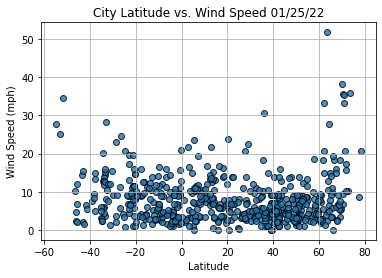

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
#MOD 6.4.2

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
#Present all info for index 13 in city_data_df dataframe
index13 = city_data_df.loc[13]
index13.head(15)

City                          Leh
Country                        IN
Date          2022-01-25 15:04:56
Lat                       34.1667
Lng                       77.5833
Max Temp                    -4.72
Humidity                       83
Cloudiness                     30
Wind Speed                   2.93
Name: 13, dtype: object

In [28]:
#Filter dataframe based on lat value, returns true or false for each row.
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
564    False
565     True
566     True
567     True
568     True
Name: Lat, Length: 569, dtype: bool

In [29]:
#Filtered dataframe
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kahului,US,2022-01-25 14:59:54,20.8947,-156.4700,71.83,89,3,5.99
3,Yellowknife,CA,2022-01-25 15:04:53,62.4560,-114.3525,5.41,92,100,15.01
7,Agadez,NE,2022-01-25 15:04:54,19.7500,10.2500,68.27,14,0,12.01
8,Marawi,PH,2022-01-25 15:04:55,7.9986,124.2928,66.65,99,100,3.33
11,Ilulissat,GL,2022-01-25 15:04:56,69.2167,-51.1000,17.62,79,100,3.44
...,...,...,...,...,...,...,...,...,...
563,Pangnirtung,CA,2022-01-25 15:19:51,66.1451,-65.7125,-11.20,70,75,0.00
565,Tomatlan,MX,2022-01-25 15:19:52,19.9333,-105.2500,71.26,47,0,2.48
566,Vostok,RU,2022-01-25 15:19:53,46.4856,135.8833,-6.09,100,100,3.96
567,Ola,RU,2022-01-25 15:19:53,59.5833,151.2833,-18.09,90,29,7.67


In [30]:
#Can execute normal dataframe operations/methods.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kahului,US,2022-01-25 14:59:54,20.8947,-156.4700,71.83,89,3,5.99
3,Yellowknife,CA,2022-01-25 15:04:53,62.4560,-114.3525,5.41,92,100,15.01
7,Agadez,NE,2022-01-25 15:04:54,19.7500,10.2500,68.27,14,0,12.01
8,Marawi,PH,2022-01-25 15:04:55,7.9986,124.2928,66.65,99,100,3.33
11,Ilulissat,GL,2022-01-25 15:04:56,69.2167,-51.1000,17.62,79,100,3.44


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

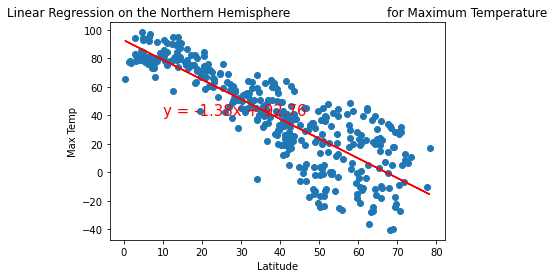

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


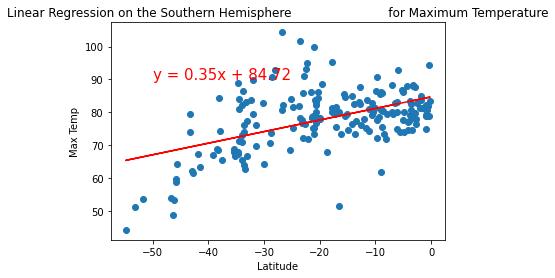

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))



In [40]:
#MOD 6.4.3

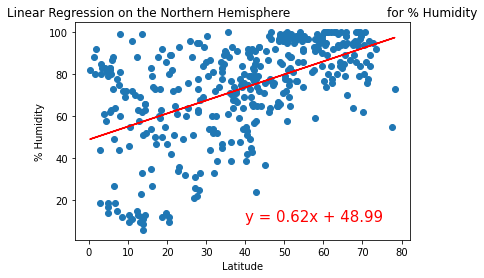

In [41]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

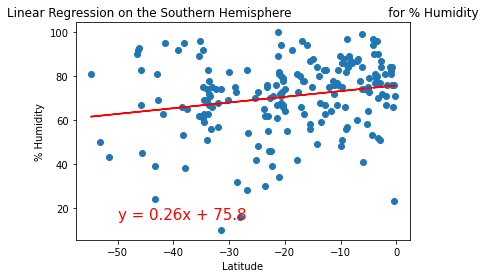

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [44]:
#MOD 6.4.4

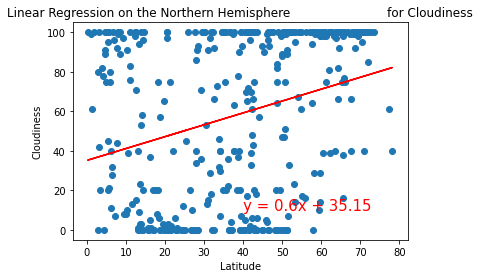

In [45]:
#Refactored code to % cloudiness/latitudes for Norther Hemisphere

# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

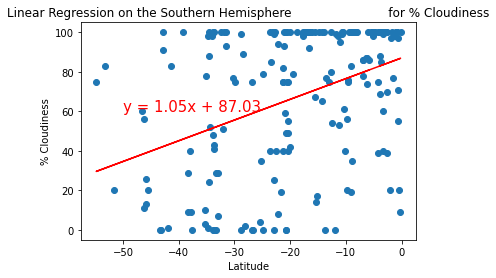

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [48]:
# _ means do not populate. 

(_, _, r_value, p_value, _) = linregress(x_values, y_values)

In [49]:
r_value

0.3915284919215213

In [50]:
p_value

2.1345734667572916e-08

In [52]:
#MOD 6.4.5

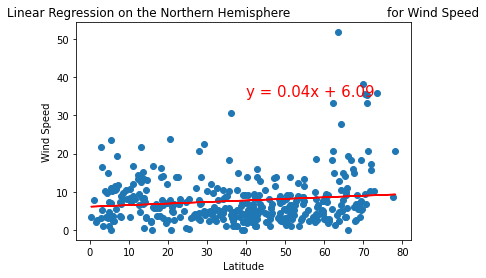

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [55]:
(_, _, r_value, p_value, _) = linregress(x_values, y_values)
r_value

0.12632428937640558